# Lab Assignment 1

## Andrew Scott Manning

### 1.4.9.1 Exercise 1.  

Run the diagnostic code and include the cell output in your notebook.

In [1]:
import tclab

print("Version = ", tclab.__version__)
tclab.diagnose()

Version =  0.4.9

Checking connection
-------------------
Looking for Arduino on any port...
Arduino Leonardo found on port COM4

Testing TCLab object in debug mode
----------------------------------
TCLab version 0.4.9
Sent: "Q1 0"
Return: "0.000"
Sent: "VER"
Return: "TCLab Firmware 3.0.0 Arduino Leonardo/Micro"
Arduino Leonardo connected on port COM4 at 115200 baud.
TCLab Firmware 3.0.0 Arduino Leonardo/Micro.
Sent: "Q2 0"
Return: "0.000"
Reading temperature
Sent: "T1"
Return: "18.643"
18.643
Sent: "Q1 0"
Return: "0.000"
Sent: "Q2 0"
Return: "0.000"
Sent: "X"
Return: "Stop"
TCLab disconnected successfully.

Testing TCLab functions
-----------------------
TCLab version 0.4.9
Arduino Leonardo connected on port COM4 at 115200 baud.
TCLab Firmware 3.0.0 Arduino Leonardo/Micro.
Testing LED. Should turn on for 10 seconds.
Countdown: 0  

Reading temperatures
T1 = 18.643 °C, T2 = 18.965 °C

Writing fractional value to heaters...
We wrote Q1 = 0.5, and read back Q1 = 0.5

We will now turn on

### 1.4.9.2 Exercise 2.

Using the Historian to save your data, and Plotter to display your data, perform a step change on Heater 1, raising the power input from 0% to 60% of full power. Collect at least 600 seconds of data for temperatures T1 and T2. Plot the results.

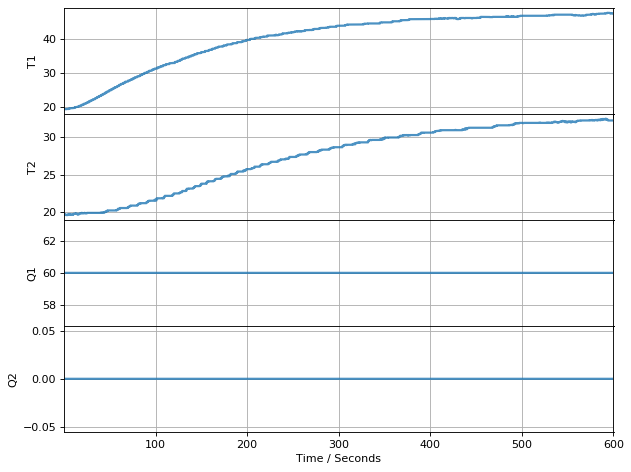

TCLab disconnected successfully.


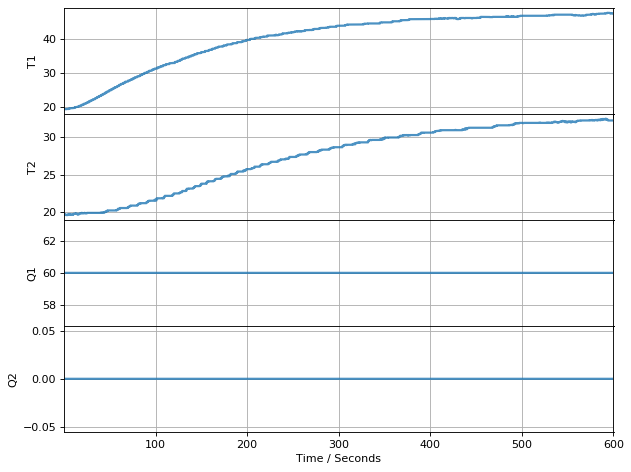

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from tclab import TCLab, clock, Historian, Plotter

t_period = 600

with TCLab() as lab:
    h = Historian(lab.sources)
    p = Plotter(h, t_period)
    for t in clock(t_period):
        lab.Q1(60)
        p.update(t)
        
h.to_csv('data_L1.csv')

          Time      T1      T2    Q1   Q2
Time                                     
0.00      0.00  19.287  19.738  60.0  0.0
1.01      1.01  19.287  19.706  60.0  0.0
2.00      2.00  19.287  19.642  60.0  0.0
3.03      3.03  19.352  19.642  60.0  0.0
4.00      4.00  19.319  19.738  60.0  0.0
...        ...     ...     ...   ...  ...
596.00  596.00  47.421  32.178  60.0  0.0
597.02  597.02  47.356  32.178  60.0  0.0
598.01  598.01  47.324  32.178  60.0  0.0
599.01  599.01  47.389  32.178  60.0  0.0
600.01  600.01  47.389  32.178  60.0  0.0

[585 rows x 5 columns]


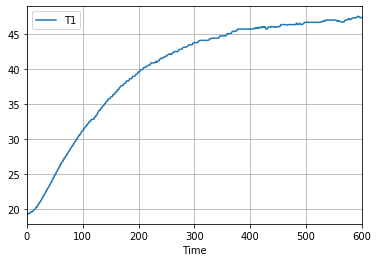

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
data = pd.read_csv('data_L1.csv')
data.index = data['Time']
print(data)
data[['T1']].plot(grid=True)

### 1.4.10 Exercise 3.

Examine the step test results for T1. Estimate 

* the characteristic time constant
* the half-life
* the system gain (Be careful. Remember to subtract the ambient temperature to get actual temperature rise due to heating.)

Use the estimated parameters to create a simulation of the heater temperature, and compare to the measured results.

### Characteristic Time Constant

Calculate the point that is 63.2% of the way from the base of the slope to the peak.

In [38]:
T_max = 47.389
T_min = 19.287

In [39]:
# Calculate temperature at 63.2% of the way to the max
Temp_Point = 0.632 * (T_max - T_min) + T_min
print('Temperature at 63.2%:',Temp_Point,'degrees Celsius')

Temperature at 63.2%: 37.047464000000005 degrees Celsius


Text(0.5, 1.0, 'Time vs Temperature for T1 Tau')

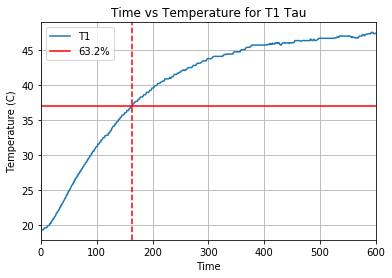

In [40]:
%matplotlib inline

time_val = 163

import pandas as pd
#pd.set_option('display.max_rows', None)
data = pd.read_csv('data_L1.csv')
data.index = data['Time']
#print(data)
data[['T1']].plot(grid=True)
plt.axhline(y=Temp_Point,color = 'r', label='63.2%')
plt.axvline(x=time_val, color = 'r', linestyle='--')
plt.legend(loc='best')
plt.ylabel('Temperature (C)')
plt.title('Time vs Temperature for T1 Tau')

In [41]:
## Calculate Time Constant
tau = time_val
print('Characteristic Time Constant =',tau,'seconds')

Characteristic Time Constant = 163 seconds


### Half-life

Calculate half-life by finding the time it takes to reach 1/2 of the max Temp.

In [42]:
# Calculate temperature at 50% of the way to the max
Temp_Half = 0.5 * (T_max - T_min) + T_min
print('50% Temperature:',Temp_Half,'degress Celcius')

Halflife = 0.693*tau
print('Half Life calculated by 0.693*Tau:',round(Halflife,2),'seconds')

50% Temperature: 33.338 degress Celcius
Half Life calculated by 0.693*Tau: 112.96 seconds


Text(0.5, 1.0, 'Time vs Temperature for T1 Half Life')

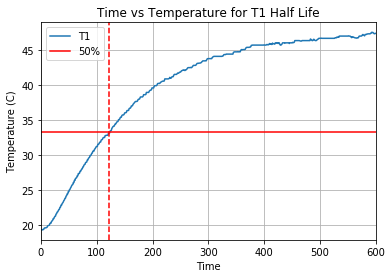

In [43]:
%matplotlib inline

time_half = 122

import pandas as pd
#pd.set_option('display.max_rows', None)
data = pd.read_csv('data_L1.csv')
data.index = data['Time']
#print(data)
data[['T1']].plot(grid=True)
plt.axhline(y=Temp_Half,color = 'r', label='50%')
plt.axvline(x=time_half, color = 'r', linestyle='--')
plt.legend(loc='best')
plt.ylabel('Temperature (C)')
plt.title('Time vs Temperature for T1 Half Life')

In [44]:
### Calculate half-life
t_half = time_half
print('Half Life calculated from graph:',t_half,'seconds')

Half Life calculated from graph: 122 seconds


### System Gain

Calculate system gain K = -b/a

In [45]:
# Set parameter for u_bar = input Q1
u_bar = 60.0
# Set parameter for total Temperature change
x_bar = T_max - T_min

In [46]:
# Calculate K
K = x_bar/u_bar
print('Gain =',round(K,4),'(degrees C)/(% Full Power)')

Gain = 0.4684 (degrees C)/(% Full Power)


### Run Simulation Estimating System

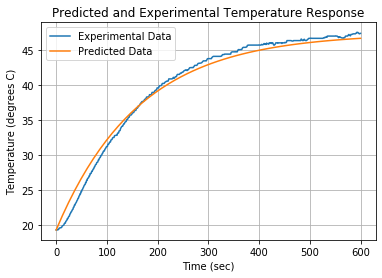

In [47]:
import numpy as np

# system data
a = -1/tau
b = -a*K
U = 60.0

t0 = 0.0
x0 = 0.0

t = np.linspace(t0, t0 + 600)

Est_list = list()
Est_list.clear()

for it in t:
    x = T_min + x0*np.exp(a*it) - (b*U/a)*(1 - np.exp(a*(it-t0)))
    Est_list.append(x)

fig, ax = plt.subplots(1, 1)
ax.plot(data["Time"],data["T1"],label='Experimental Data')
ax.plot(t,Est_list,label='Predicted Data')
ax.set_ylabel("Temperature (degrees C)")
ax.set_xlabel("Time (sec)")
ax.set_title("Predicted and Experimental Temperature Response")
ax.legend(loc='best')
ax.grid(True)

#### Analysis of Predicted Model

The model provides an accurate estimate of the experimental data, but the model slightly overestimates the temperature at short times and slightly underestimates the temperature at long times. This behavior could be improved by setting a lag time for the function to resolve the short time errors and by increasing the gain to resolve the long time errors. 

### 1.4.11 Exercise 4.

Examine the data for the response of temperature T2 due to a step change in heater 1. Does that appear to be the response of a first-order linear system? How does it differ? Can you still estimate a gain?

The response for T2 appears to have an inflection point on the graph, indicating that this response is not of a first-order linear system. The system can still be approximated by a first-order linear system, but the estimate will be poor for the initial time of the measurements. But using a first-order linear approximation, a gain can be estimated using the same strategy as for T1 estimation.

In [48]:
T_max = 32.178
T_min = 19.738

In [49]:
# Calculate temperature at 63.2% of the way to the max
Temp_Point = 0.632 * (T_max - T_min) + T_min
print('Temperature at 63.2%:',Temp_Point,'degrees Celsius')

Temperature at 63.2%: 27.60008 degrees Celsius


Text(0.5, 1.0, 'Time vs Temperature for T2 Tau')

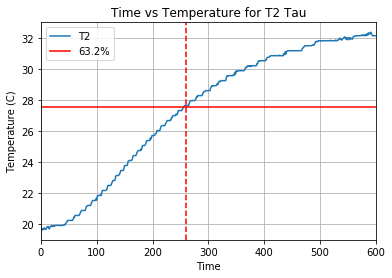

In [50]:
%matplotlib inline

time_val = 260

import pandas as pd
#pd.set_option('display.max_rows', None)
data = pd.read_csv('data_L1.csv')
data.index = data['Time']
#print(data)
data[['T2']].plot(grid=True)
plt.axhline(y=Temp_Point,color = 'r', label='63.2%')
plt.axvline(x=time_val, color = 'r', linestyle='--')
plt.legend(loc='best')
plt.ylabel('Temperature (C)')
plt.title('Time vs Temperature for T2 Tau')

In [51]:
## Calculate Time Constant
tau = time_val
print('Characteristic Time Constant =',tau,'seconds')

Characteristic Time Constant = 260 seconds


### Half-life

Calculate half-life by finding the time it takes to reach 1/2 of the max Temp.

In [52]:
# Calculate temperature at 50% of the way to the max
Temp_Half = 0.5 * (T_max - T_min) + T_min
print('50% Temperature:',Temp_Half,'degress Celcius')

Halflife = 0.693*tau
print('Half Life calculated by 0.693*Tau:',round(Halflife,2),'seconds')

50% Temperature: 25.958 degress Celcius
Half Life calculated by 0.693*Tau: 180.18 seconds


Text(0.5, 1.0, 'Time vs Temperature for T2 Half Life')

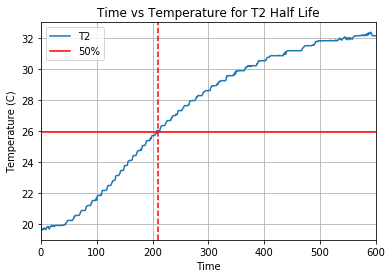

In [53]:
%matplotlib inline

time_half = 210

import pandas as pd
#pd.set_option('display.max_rows', None)
data = pd.read_csv('data_L1.csv')
data.index = data['Time']
#print(data)
data[['T2']].plot(grid=True)
plt.axhline(y=Temp_Half,color = 'r', label='50%')
plt.axvline(x=time_half, color = 'r', linestyle='--')
plt.legend(loc='best')
plt.ylabel('Temperature (C)')
plt.title('Time vs Temperature for T2 Half Life')

In [54]:
### Calculate half-life
t_half = time_half
print('Half Life calculated from graph:',t_half,'seconds')

Half Life calculated from graph: 210 seconds


### System Gain

Calculate system gain K = -b/a

In [55]:
# Set parameter for u_bar = input Q1
u_bar = 60.0
# Set parameter for total Temperature change
x_bar = T_max - T_min

In [56]:
# Calculate K
K = x_bar/u_bar
print('Gain =',round(K,4),'(degrees C)/(% Full Power)')

Gain = 0.2073 (degrees C)/(% Full Power)


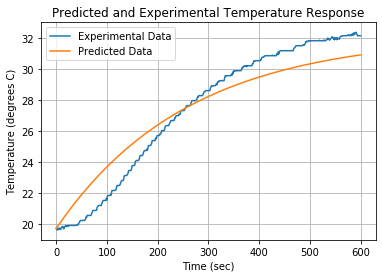

In [57]:
import numpy as np

# system data
a = -1/tau
b = -a*K
U = 60.0

t0 = 0.0
x0 = 0.0

t = np.linspace(t0, t0 + 600)

Est_list = list()
Est_list.clear()

for it in t:
    x = T_min + x0*np.exp(a*it) - (b*U/a)*(1 - np.exp(a*(it-t0)))
    Est_list.append(x)

fig, ax = plt.subplots(1, 1)
ax.plot(data["Time"],data["T2"],label='Experimental Data')
ax.plot(t,Est_list,label='Predicted Data')
ax.set_ylabel("Temperature (degrees C)")
ax.set_xlabel("Time (sec)")
ax.set_title("Predicted and Experimental Temperature Response")
ax.legend(loc='best')
ax.grid(True)

#### Analysis of Predicted Model

This model does not accurately model the data. The model overestimates the temperature for short times and underestimates the times for long times. A lag time could be incorporated into the model to improve the model for short times and the gain could be increased to improve the model for long times.